In [308]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [309]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=";")

In [310]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [311]:
dfs = df[['Dato', 'Linjenavn', 'Passasjerer_Ombord']]

In [312]:
dfs.head()

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10


In [313]:
dfs["Linjenavn"].nunique()

150

In [314]:
dfs = dfs[df.Linjenavn == "150"] 
dfs = dfs[df.Passasjerer_Ombord > -1]

C:\Users\erlin\AppData\Local\Temp/ipykernel_18900/4167622768.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfs = dfs[df.Passasjerer_Ombord > -1]


In [315]:
dfs.Linjenavn.nunique()

1

In [316]:
dfs.size

288

In [317]:
dfs = dfs[["Dato", "Passasjerer_Ombord"]]

In [318]:
dfs.reset_index

<bound method DataFrame.reset_index of             Dato  Passasjerer_Ombord
0     10/08/2020                   5
1     15/08/2020                   5
2     03/08/2020                   6
3     27/07/2020                  10
4     27/08/2020                  10
...          ...                 ...
5071  27/08/2020                   0
5419  27/07/2020                   1
5427  15/08/2020                   1
5431  13/08/2020                   2
5434  08/08/2020                   7

[96 rows x 2 columns]>

In [319]:
dfs.Dato = pd.to_datetime(dfs["Dato"])

In [320]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 5434
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Dato                96 non-null     datetime64[ns]
 1   Passasjerer_Ombord  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


In [321]:
dfs['year'] = dfs.Dato.dt.year
dfs['month'] = dfs.Dato.dt.month
dfs['day'] = dfs.Dato.dt.day

In [322]:
dfs = dfs.drop(labels="Dato", axis=1)

In [323]:
from sklearn.ensemble import RandomForestClassifier

In [324]:
X_train, X_test, y_train, y_test = train_test_split(dfs[["year", "month", "day"]], dfs["Passasjerer_Ombord"], test_size=0.25, random_state=42)


In [325]:
model = RandomForestClassifier(random_state=0, max_depth=20)
model2 = RandomForestClassifier(random_state=0, max_depth=20)

In [326]:
model.fit(dfs[["year", "month", "day"]], dfs.Passasjerer_Ombord)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [327]:
preds = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))


MAE: 4.041666666666667


In [328]:
#To predict a day, edit day, month and year under and run this cell

day = 10
month = 30
year = 2020

preds = model2.predict([[year, month, day]])
print("Our model predicts", preds[0], "passenger(s) in the bus on this day")

Our model predicts 1 passenger(s) in the bus on this day


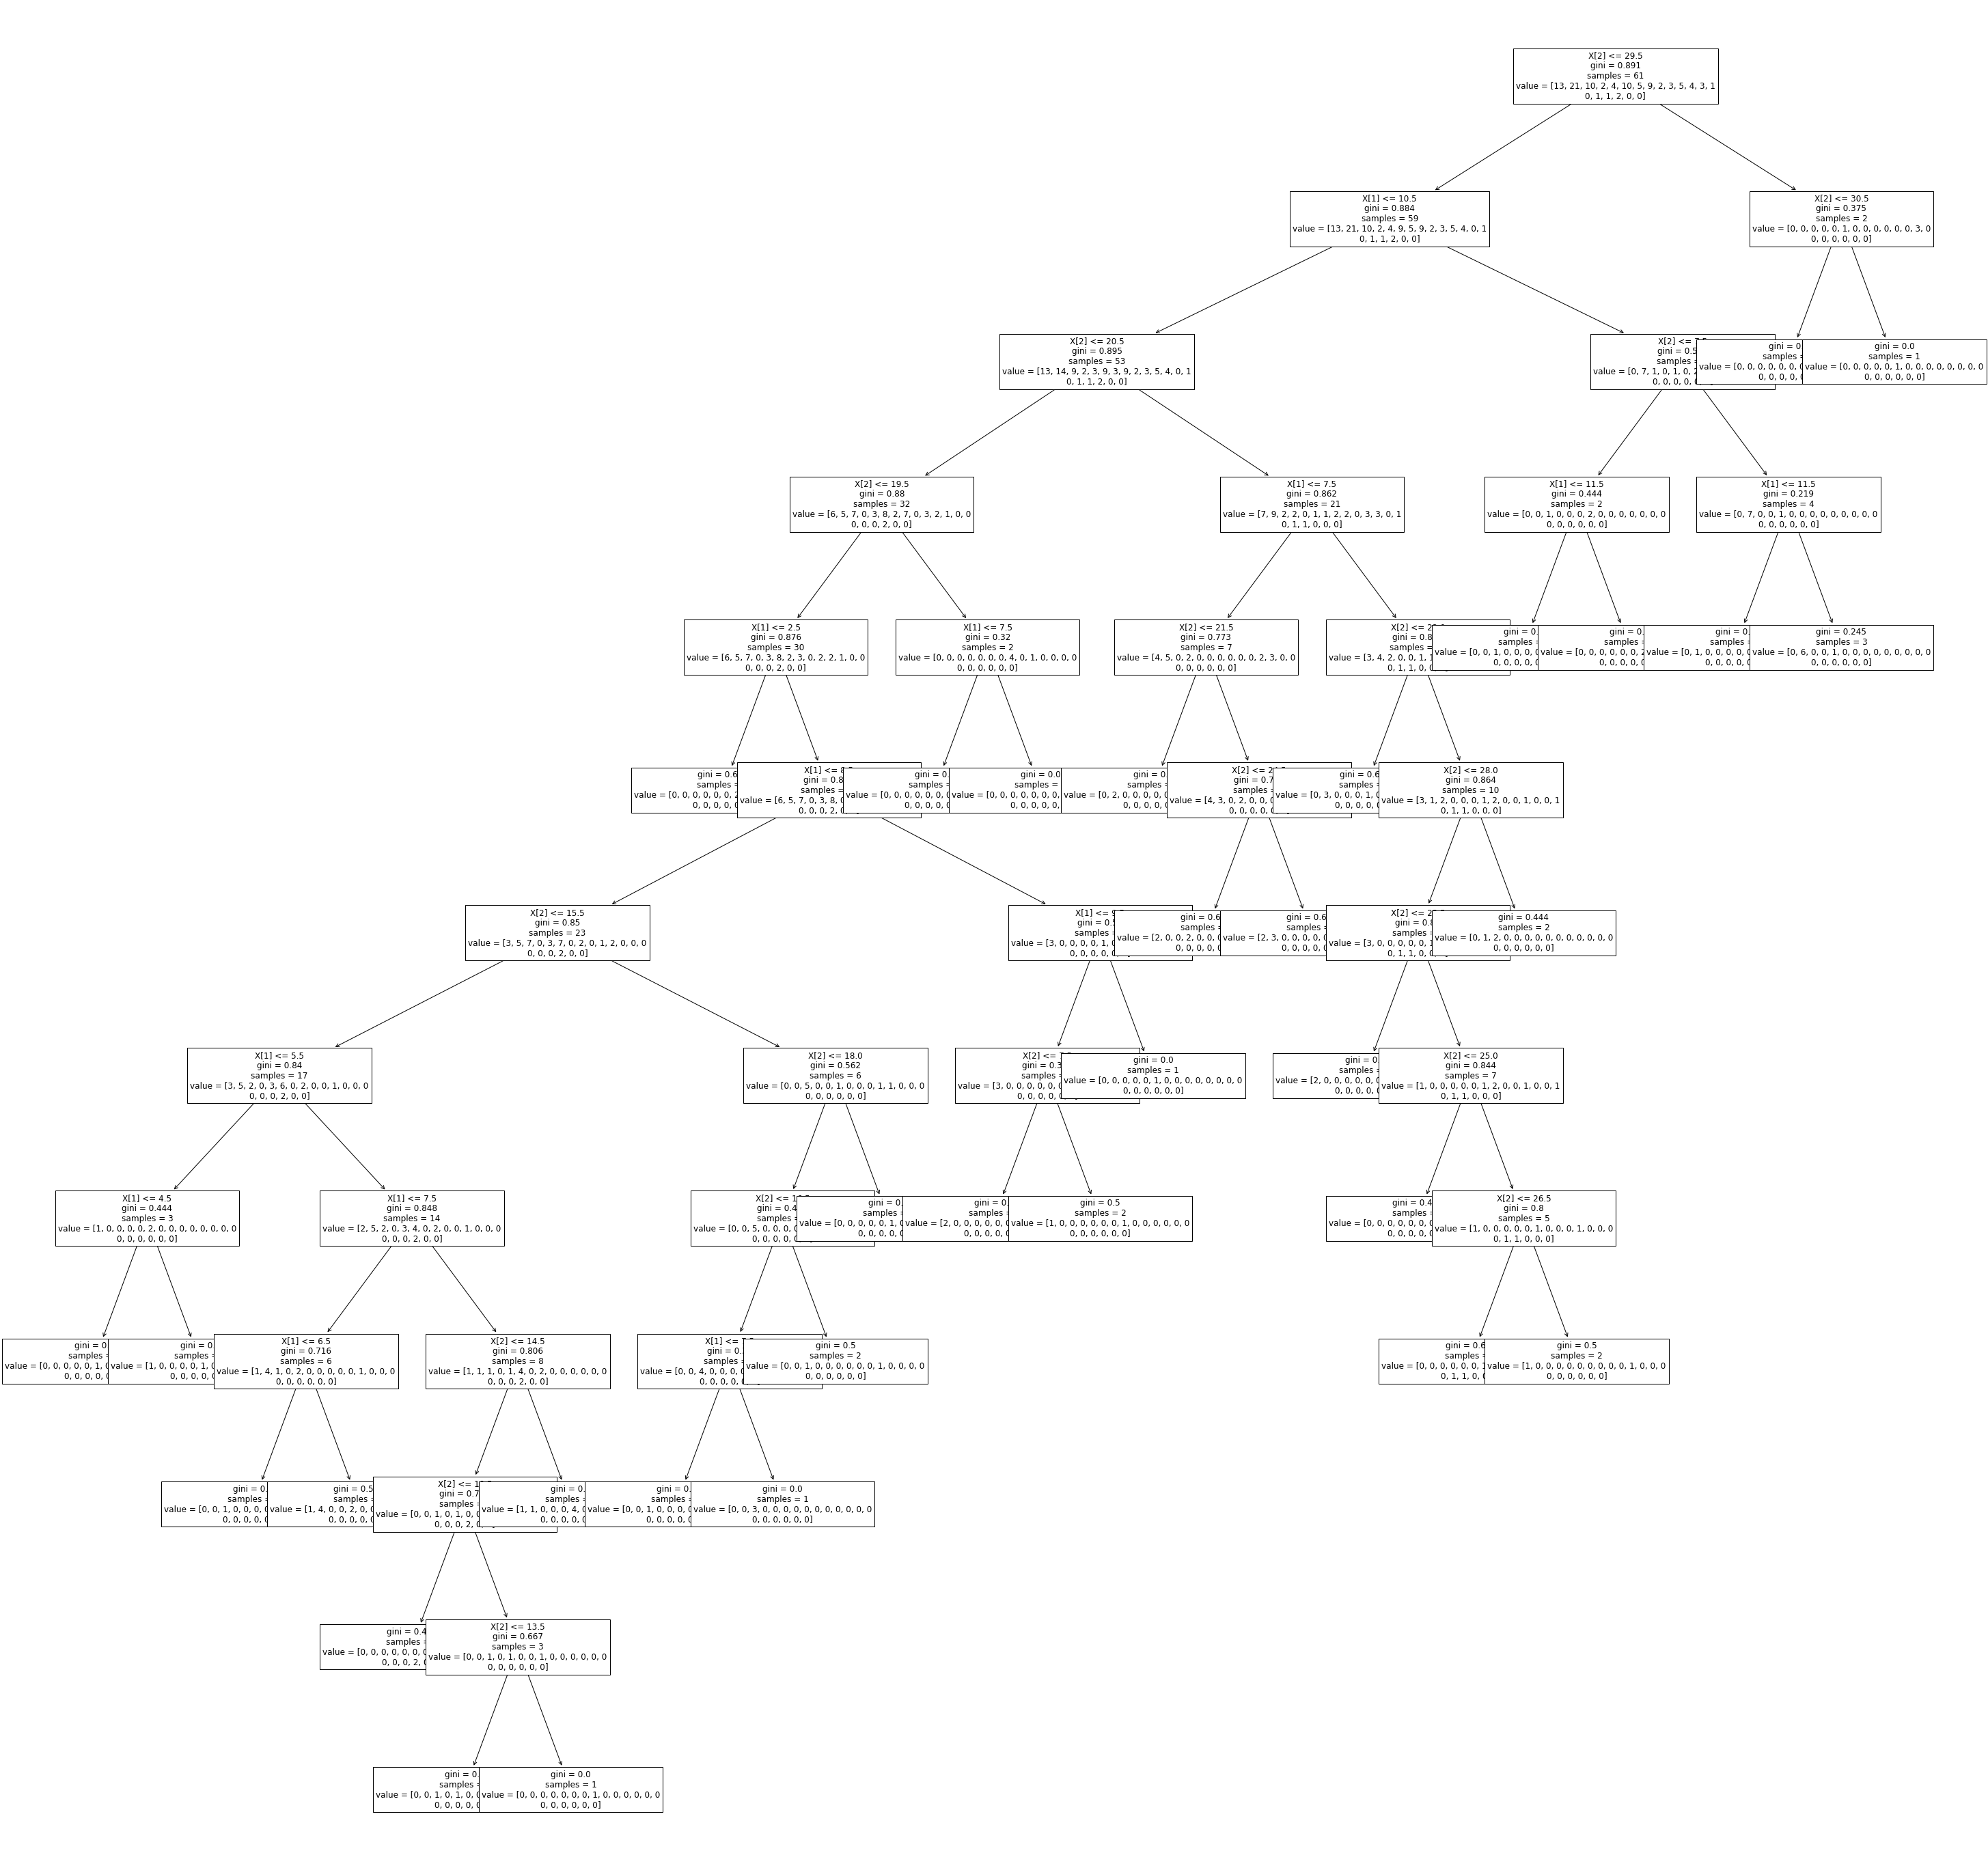

In [333]:
#Get illustration of the first tree in the forest

from sklearn import tree

plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(model.estimators_[0], fontsize=12)
plt.show()

